<a href="https://colab.research.google.com/github/DLSeed/DeepLearning/blob/main/waifu_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers gradio scipy ftfy "ipywidgets>=7,<8" datasets diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.7 MB 29.5 MB/s 
     |████████████████████████████████| 6.1 MB 48.6 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 365 kB 63.6 MB/s 
     |████████████████████████████████| 153 kB 61.9 MB/s 
     |████████████████████████████████| 1.6 MB 59.3 MB/s 
     |████████████████████████████████| 6.6 MB 44.9 MB/s 
     |████████████████████████████████| 120 kB 69.9 MB/s 
     |████████████████████████████████| 212 kB 68.6 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 112 kB 68.1 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 2.3 MB 54.9 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 55 kB 2.4 MB/s 
     |████████████████████████████████| 5

In [21]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline

def dummy_checker(images, **kwargs): 
  return images, False

model_id = "hakurei/waifu-diffusion"
device = "cuda"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16, revision='fp16') 
pipe = pipe.to(device)
pipe.safety_checker = dummy_checker


  0%|          | 0/50 [00:00<?, ?it/s]

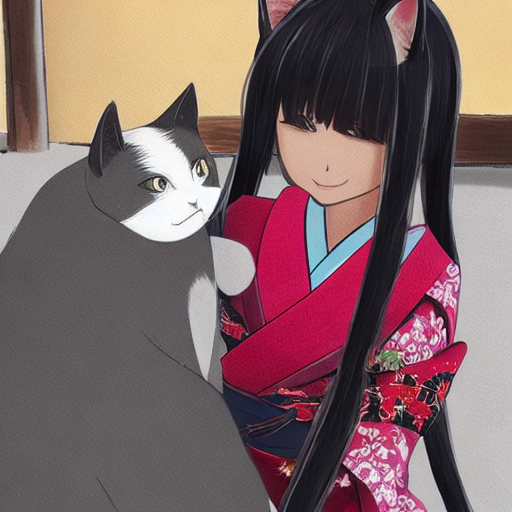

In [24]:
num_samples = 1
def infer(prompt,generator):
    with autocast("cuda"):
        images = pipe([prompt] * num_samples, guidance_scale=7.5, num_inference_steps=50, generator=generator)["sample"]  
    return images


generator = torch.Generator(device=device).manual_seed(1024)
prompt = "a cat with a japanese girl's style"  #a grown-up terrorist snatched a little girl's purse， anime
images = infer(prompt,generator)

images[0]